In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
dataset = pd.read_excel("data_karyawan.xlsx")
x = dataset.iloc[:, [3,4]].values
y = dataset.iloc[:, 8].values

Keterangan:
Principal Data scientist = 1, ML Enginer = 2, Data Scientist = 3, Applied Scientist = 4, Data Analyst = 5, Data Modeler = 6, Research Engineer = 7, Analytics Engineer = 8, Business Intelligence Engineer = 9, Machine Learning Engineer = 10

In [25]:
print(x)

[[     1  80000]
 [     2  30000]
 [     2  25500]
 [     3 175000]
 [     3 120000]
 [     4 222200]
 [     4 136000]
 [     3 219000]
 [     3 141000]
 [     3 147100]
 [     3  90700]
 [     5 130000]
 [     5 100000]
 [     4 213660]
 [     4 130760]
 [     6 147100]
 [     6  90700]
 [     3 170000]
 [     3 150000]
 [     5 150000]
 [     5 110000]
 [     7 275000]
 [     7 174000]
 [     8 230000]
 [     8 143200]
 [     9 225000]
 [     9 156400]
 [    10 200000]
 [    10 130000]]


In [26]:
print(y)

[100 100 100 100 100   0   0   0   0   0   0 100 100   0   0   0   0   0
   0 100 100   0   0 100 100   0   0   0   0]


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

In [28]:
print(x_train)

[[     4 222200]
 [     4 130760]
 [     3 141000]
 [     6  90700]
 [     7 174000]
 [     3 170000]
 [     2  30000]
 [     3  90700]
 [    10 130000]
 [     4 136000]
 [     3 120000]
 [     3 150000]
 [     5 150000]
 [     3 147100]
 [     3 219000]
 [     8 143200]
 [     3 175000]
 [     1  80000]
 [     7 275000]
 [     6 147100]
 [     5 100000]]


In [29]:
print(y_train)

[  0   0   0   0   0   0 100   0   0   0 100   0 100   0   0 100 100 100
   0   0 100]


In [30]:
print(y_test)

[100 100 100   0 100   0   0   0]


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
print(x_train)

[[-0.19926335  1.49962595]
 [-0.19926335 -0.25151227]
 [-0.66421116 -0.0554093 ]
 [ 0.73063228 -1.01868853]
 [ 1.1955801   0.57656315]
 [-0.66421116  0.49996043]
 [-1.12915898 -2.18113482]
 [-0.66421116 -1.01868853]
 [ 2.59042354 -0.26606679]
 [-0.19926335 -0.1511627 ]
 [-0.66421116 -0.45757359]
 [-0.66421116  0.11694682]
 [ 0.26568447  0.11694682]
 [-0.66421116  0.06140985]
 [-0.66421116  1.43834377]
 [ 1.66052791 -0.01327781]
 [-0.66421116  0.59571383]
 [-1.59410679 -1.22360081]
 [ 1.1955801   2.51078187]
 [ 0.73063228  0.06140985]
 [ 0.26568447 -0.8405872 ]]


In [33]:
print(x_test)

[[-1.12915898 -2.26731289]
 [ 0.26568447 -0.64908039]
 [ 1.66052791  1.64900125]
 [-0.19926335  1.33607913]
 [ 0.26568447 -0.26606679]
 [ 2.12547573  1.55324785]
 [ 2.59042354  1.07448084]
 [ 2.12547573  0.23951118]]


In [34]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive bayes
classifier = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
classifier.fit(x_train, y_train)


GaussianNB()

In [35]:
y_pred = classifier.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4 0]
 [3 1]]


<ipython-input-37-305df65519f5>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


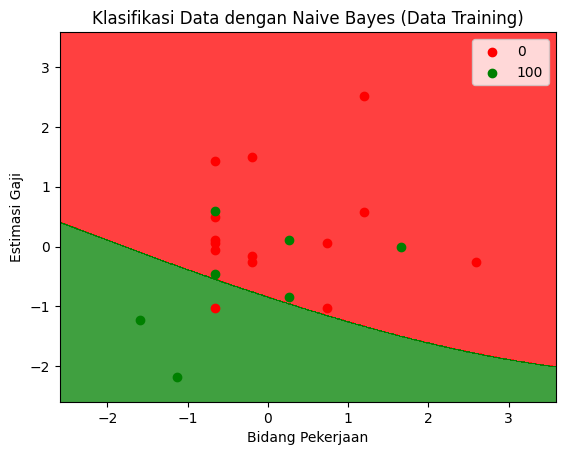

In [37]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Bidang Pekerjaan')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()